# Práctica de NLP con Python y Google Colab para n-gramas

Objetivo
Analizar el texto de un libro y generar n-gramas para entender la estructura del lenguaje.

# Importamos las librerias

In [49]:
import nltk
from nltk.util import ngrams
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el texto del libro



In [50]:
import requests

# URL del libro en Proyecto Gutenberg
url = "https://www.gutenberg.org/files/11/11-0.txt"

# Hace UNA solicitud HTTP para descargar el contenido
response = requests.get(url)

# AsegUra de que la descarga fue exitosa
if response.status_code == 200:
    texto = response.text
else:
    print("Error al descargar el archivo.")


# Tokenizar el texto

In [51]:
tokens = nltk.word_tokenize(texto)

# Generar n-gramas

In [52]:
# Genera 2-gramas (bigramas)
ngramas = ngrams(tokens, 2)


# Mostrar los 10 primeros n-gramas

In [53]:
print(list(ngramas)[:10])

[('*', '*'), ('*', '*'), ('*', 'START'), ('START', 'OF'), ('OF', 'THE'), ('THE', 'PROJECT'), ('PROJECT', 'GUTENBERG'), ('GUTENBERG', 'EBOOK'), ('EBOOK', '11'), ('11', '*')]


# Generar n-gramas de longitud 3

In [54]:
ngramas_3 = ngrams(tokens, 3)
print(list(ngramas_3)[:10])


[('*', '*', '*'), ('*', '*', 'START'), ('*', 'START', 'OF'), ('START', 'OF', 'THE'), ('OF', 'THE', 'PROJECT'), ('THE', 'PROJECT', 'GUTENBERG'), ('PROJECT', 'GUTENBERG', 'EBOOK'), ('GUTENBERG', 'EBOOK', '11'), ('EBOOK', '11', '*'), ('11', '*', '*')]


#  Tareas


1. Cambia la longitud de los n-gramas a 4 o 5 y observa cómo cambia la salida.

In [45]:
# Genera 4-gramas
ngramas_4 = ngrams(tokens, 4)

# Muestra los primeros 10 4-gramas
print(list(ngramas_4)[:10])


[('*', '*', '*', 'START'), ('*', '*', 'START', 'OF'), ('*', 'START', 'OF', 'THE'), ('START', 'OF', 'THE', 'PROJECT'), ('OF', 'THE', 'PROJECT', 'GUTENBERG'), ('THE', 'PROJECT', 'GUTENBERG', 'EBOOK'), ('PROJECT', 'GUTENBERG', 'EBOOK', '11'), ('GUTENBERG', 'EBOOK', '11', '*'), ('EBOOK', '11', '*', '*'), ('11', '*', '*', '*')]


In [46]:
# Genera 5-gramas
ngramas_5 = ngrams(tokens, 5)

# Muestra los primeros 10 5-gramas
print(list(ngramas_5)[:10])


[('*', '*', '*', 'START', 'OF'), ('*', '*', 'START', 'OF', 'THE'), ('*', 'START', 'OF', 'THE', 'PROJECT'), ('START', 'OF', 'THE', 'PROJECT', 'GUTENBERG'), ('OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK'), ('THE', 'PROJECT', 'GUTENBERG', 'EBOOK', '11'), ('PROJECT', 'GUTENBERG', 'EBOOK', '11', '*'), ('GUTENBERG', 'EBOOK', '11', '*', '*'), ('EBOOK', '11', '*', '*', '*'), ('11', '*', '*', '*', '[')]


2. Utiliza la función FreqDist de NLTK para calcular la frecuencia de cada n-grama.

In [42]:
from nltk import FreqDist

# Convierte el generador de n-gramas a una lista
ngramas_4_lista = list(ngrams(tokens, 4))

# Calcula la frecuencia de los 4-gramas
freq_ngramas_4 = FreqDist(ngramas_4_lista)

# Muestra las 10 frecuencias más comunes
print(freq_ngramas_4.most_common(10))


[((',', '”', 'said', 'the'), 138), ((',', '”', 'said', 'Alice'), 74), (('*', '*', '*', '*'), 51), (('”', 'said', 'Alice', ','), 39), (('!', '”', 'said', 'the'), 39), (('”', 'said', 'Alice', '.'), 33), (('said', 'Alice', '.', '“'), 32), (('”', 'said', 'the', 'King'), 29), (('I', 'don', '’', 't'), 28), (('!', '”', 'said', 'Alice'), 21)]


In [41]:
from nltk import FreqDist

# Convierte el generador de n-gramas a una lista
ngramas_5_lista = list(ngrams(tokens, 5))

# Calcula la frecuencia de los 4-gramas
freq_ngramas_5 = FreqDist(ngramas_5_lista)

# Muestra las 10 frecuencias más comunes
print(freq_ngramas_5.most_common(10))


[(('*', '*', '*', '*', '*'), 48), (('”', 'said', 'Alice', '.', '“'), 32), ((',', '”', 'said', 'Alice', ','), 24), ((',', '”', 'said', 'the', 'King'), 22), ((',', '”', 'said', 'Alice', '.'), 19), (('”', 'said', 'the', 'Mock', 'Turtle'), 19), ((',', '”', 'said', 'the', 'Hatter'), 18), (('”', 'she', 'said', 'to', 'herself'), 15), (('“', 'I', 'don', '’', 't'), 15), ((',', '”', 'said', 'the', 'Mock'), 15)]


3. Utiliza la función plot de matplotlib para visualizar la distribución de frecuencias de los n-gramas.

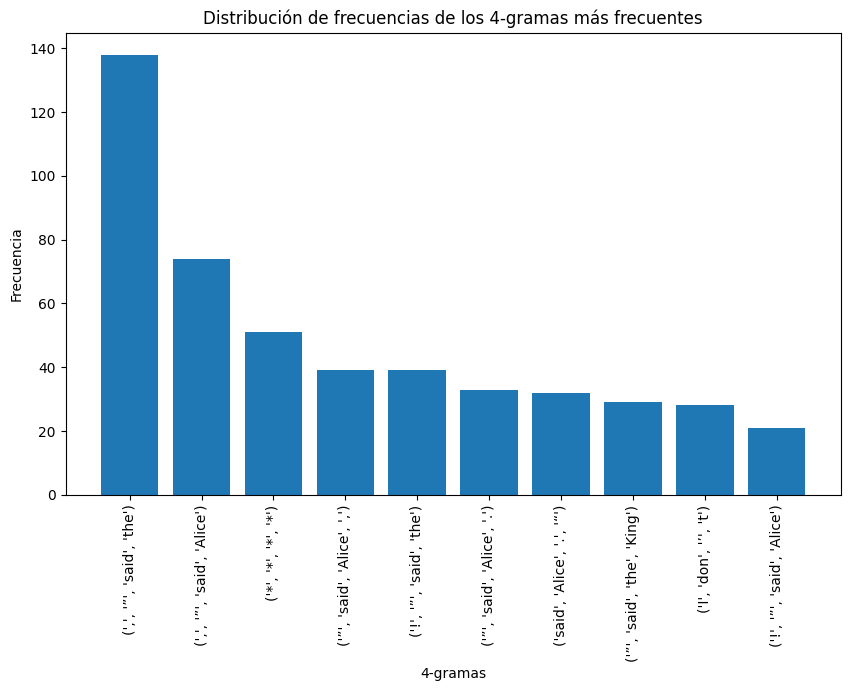

In [43]:
# Crea el gráfico de barras de los 10 4-gramas más frecuentes
top_10_ngrams_4 = freq_ngramas_4.most_common(10)

# Extrae las 4-gramas y sus frecuencias
ngrams_4_labels = [str(ngrama[0]) for ngrama in top_10_ngrams_4]
ngrams_4_values = [ngrama[1] for ngrama in top_10_ngrams_4]

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ngrams_4_labels, ngrams_4_values)
plt.xlabel("4-gramas")
plt.ylabel("Frecuencia")
plt.title("Distribución de frecuencias de los 4-gramas más frecuentes")
plt.xticks(rotation=90)
plt.show()


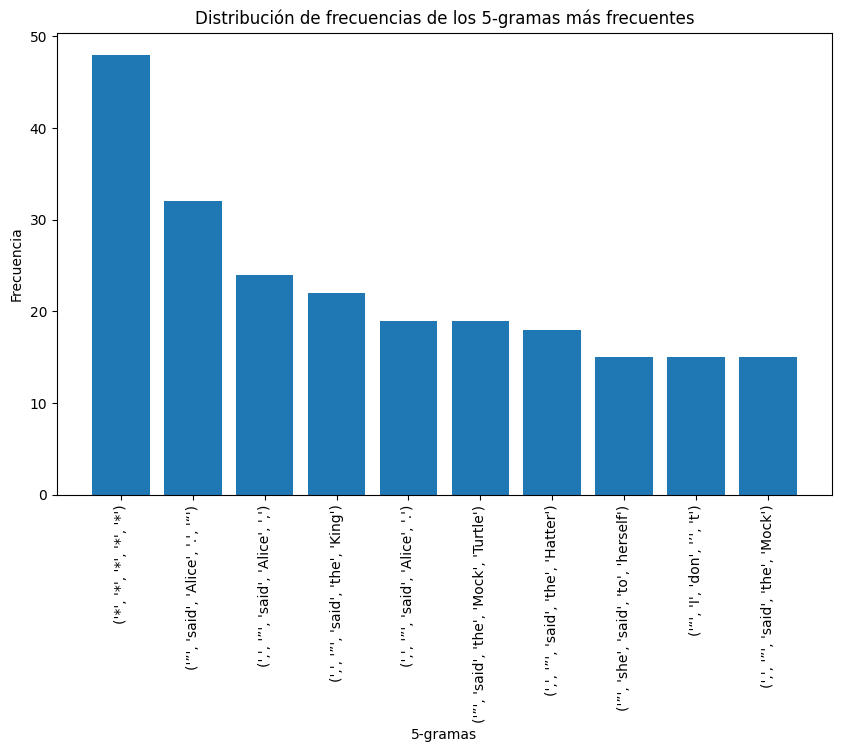

In [44]:
# Crea el gráfico de barras de los 10 5-gramas más frecuentes
top_10_ngrams_5 = freq_ngramas_5.most_common(10)

# Extrae las 5-gramas y sus frecuencias
ngrams_5_labels = [str(ngrama[0]) for ngrama in top_10_ngrams_5]
ngrams_5_values = [ngrama[1] for ngrama in top_10_ngrams_5]

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ngrams_5_labels, ngrams_5_values)
plt.xlabel("5-gramas")
plt.ylabel("Frecuencia")
plt.title("Distribución de frecuencias de los 5-gramas más frecuentes")
plt.xticks(rotation=90)
plt.show()
